<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

## The Equation *y = mx + b*: Real-Life Applications and Machine Learning Use

The equation $y = mx + b$ is a linear equation, often referred to as the **"slope-intercept form."** In this equation:
- '*m*' represents the **slope** of the line, indicating steepness or gradient. It tells us how much the 'y' value changes for every unit increase in 'x'.
- '*b*' is the **y-intercept**, the point where the line crosses the y-axis, giving us the starting point.
- 'x' and 'y' are the coordinates of any point on the line.

### Real-Life Applications:

1. **Profit and Cost Analysis**: In business, this equation can model profit or cost functions. For example, a company's cost function: $C(x) = \text{{\$}}2x + \text{{\$}}500$ means their fixed costs are $\text{{\$}}500$, and each additional item produced adds $\text{{\$}}2$ to the total cost. This aids in pricing and production decisions.
2. **Distance and Speed**: The equation can represent distance over time. $D(t) = 30t + 50$ means an object is moving at $30$ units per time unit, starting $50$ units away. Useful in navigation.
3. **Investment Growth**: In finance, it models investment growth: $\text{{\$}}y = 0.05x + \text{{\$}}100$ means an investment of $\text{{\$}}100$ grows at $5\%$ annually.

### Machine Learning Use Case:

**Simple Linear Regression**: $y = mx + b$ is fundamental in machine learning. In a housing price prediction model: $Price = 150 * Size + \text{{\$}}50,000$, 'm' is the price increase per square foot, and 'b' is the base price. Machine learning algorithms learn 'm' and 'b' from data to make predictions.

---

In summary, $y = mx + b$ is a versatile tool, applicable in business, physics, finance, and machine learning, for understanding relationships between variables.

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [2]:
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp38-cp38-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp38-cp38-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp38-cp38-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.51.0-cp38-cp38-win_amd64.whl (1.5 MB)
Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
Using cached kiwisolver-1.4.5-cp38-cp38-win_amd64.whl (5

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


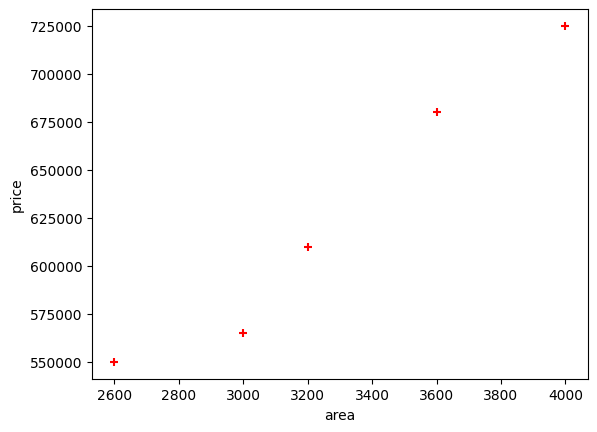

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [6]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
area = df.area
area
type(area)
# if doing like this will have reshape area into 2d array of single column
area = area.values.reshape(-1, 1)

In [8]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

 The fit method essentially finds the best-fitting line or hyperplane that relates the input data to the target values.

In [9]:
# Create linear regression object
reg = LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

scikit-learn expects a 2D array as input, even if you are making a prediction for a single data point. This is because the model is designed to work with multiple features, and each data point is expected to be a row in the 2D array.

In [10]:
reg.predict([[3300]])

c:\work_local\Notes\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [11]:
reg.coef_

array([135.78767123])

In [12]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [13]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [14]:
reg.predict([[5000]])

c:\work_local\Notes\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [15]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [16]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [17]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


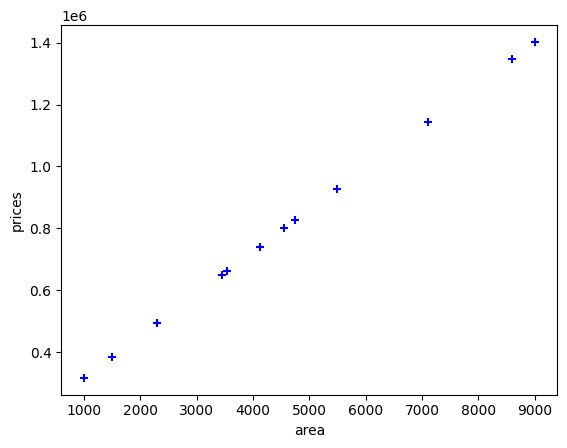

In [18]:
plt.xlabel("area")
plt.ylabel("prices")
plt.scatter(area_df["area"],area_df["prices"],color='blue',marker='+')

In [19]:
area_df.to_csv("prediction.csv")

<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

41288.69409442